
**Stroke prediction using Support Vector Machine**


According to the World Health Organization (WHO) **stroke is the 2nd leading cause of death globally**, responsible for approximately 11% of total deaths.

In [ ]:
# Import necessary libraries
import numpy as np  # For numerical operations
import pandas as pd  # For handling datasets (DataFrames)
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns  # For enhanced visualization

# Set Seaborn style for better-looking plots
sns.set_style('whitegrid')

In [ ]:
path="/content/sample_data/healthcare-dataset-stroke-data.csv"
print("Path to dataset files:", path)
# Load the stroke prediction dataset
df_w = pd.read_csv(path)

# Drop the 'id' column as it is not useful for prediction
df = df_w.drop('id', axis=1)

# Display the first 5 rows of the dataset
print(df.head())


Path to dataset files: /content/sample_data/healthcare-dataset-stroke-data.csv
   gender   age  hypertension  heart_disease ever_married      work_type  \
0    Male  67.0             0              1          Yes        Private   
1  Female  61.0             0              0          Yes  Self-employed   
2    Male  80.0             0              1          Yes        Private   
3  Female  49.0             0              0          Yes        Private   
4  Female  79.0             1              0          Yes  Self-employed   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0          Urban             228.69  36.6  formerly smoked       1  
1          Rural             202.21   NaN     never smoked       1  
2          Rural             105.92  32.5     never smoked       1  
3          Urban             171.23  34.4           smokes       1  
4          Rural             174.12  24.0     never smoked       1  


The dataset consists of 5110 instances with following features with target being stroke (To be predicted by our model)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


All columns except one ('bmi') have all non-null values. The 'bmi column will have to go some processing so it consists of no non-null entries

In [ ]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


**Data Cleaning**

In [ ]:
# Replacing missing NA values in 'bmi' with their mean bmi of their gender

F_missing_bmi_index = df[(df.gender == 'Female') & (df.bmi.isna())].index
df.loc[F_missing_bmi_index, 'bmi'] = 29

M_missing_bmi_index = df[(df.gender == 'Male') & (df.bmi.isna())].index
df.loc[M_missing_bmi_index, 'bmi'] = 28

In [ ]:
# Removing the one instance where gender is 'Other'

other_index = df[df['gender'] =='Other'].index
df = df.drop(other_index)

**Visualizing features**

Does smoking, work type, choice of residence have any relation with stroke probability? Lets find out.

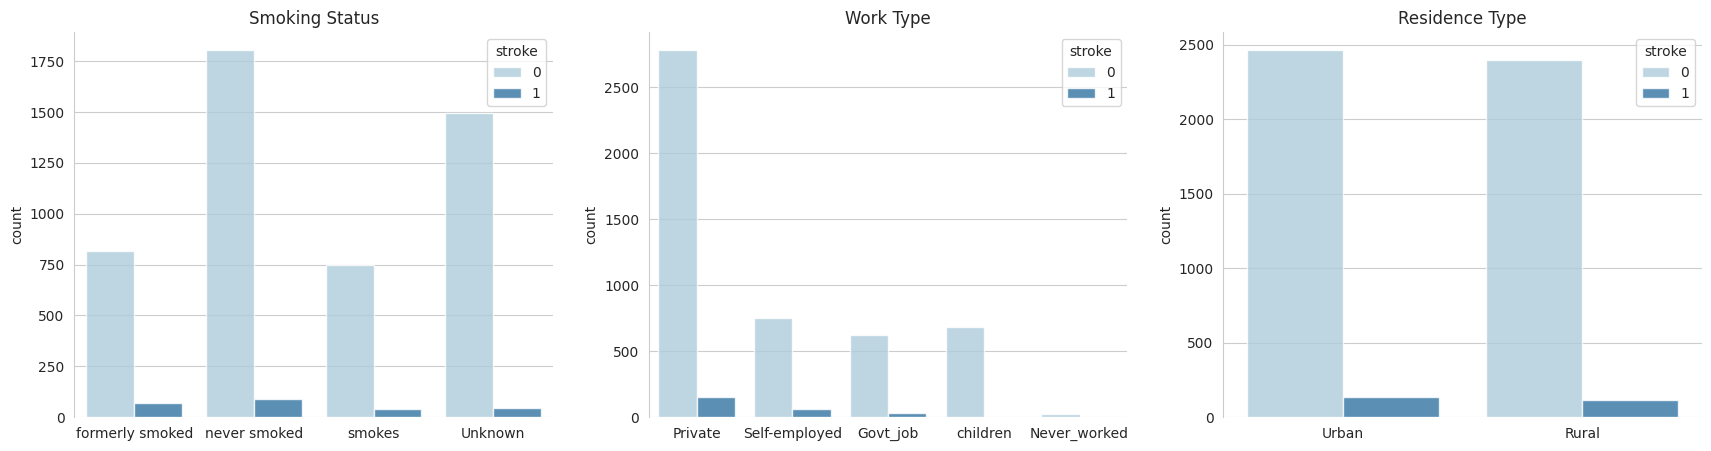

In [ ]:
# Import necessary libraries
import warnings  # Used to manage warnings
warnings.filterwarnings('ignore')  # Ignore warning messages

import matplotlib.pyplot as plt  # For visualization
import seaborn as sns  # Advanced statistical visualization

# Set figure size to make the plots larger and readable
plt.figure(figsize=(21, 5))

# ---- First Plot: Smoking Status vs Stroke ----
plt.subplot(1, 3, 1)  # Create a subplot (1 row, 3 columns, position 1)
sns.countplot(x=df['smoking_status'], alpha=0.8, palette="Paired", hue=df['stroke'])
# Creates a count plot showing the number of people in each smoking category,
# colored by whether they had a stroke or not

sns.despine(top=True, right=True, left=False, bottom=True)
# Remove the top and right borders of the plot for better readability

plt.xlabel('')  # Remove x-axis label to keep it clean
plt.title('Smoking Status')  # Set the title of the plot

# ---- Second Plot: Work Type vs Stroke ----
plt.subplot(1, 3, 2)  # Create a subplot (1 row, 3 columns, position 2)
sns.countplot(x=df['work_type'], alpha=0.8, palette="Paired", hue=df['stroke'])
# Count plot for work type, categorized by stroke occurrence

sns.despine(top=True, right=True, left=False, bottom=True)
# Remove unnecessary plot borders

plt.xlabel('')  # Remove x-axis label
plt.title('Work Type')  # Set the title of the plot

# ---- Third Plot: Residence Type vs Stroke ----
plt.subplot(1, 3, 3)  # Create a subplot (1 row, 3 columns, position 3)
sns.countplot(x=df['Residence_type'], alpha=0.8, palette="Paired", hue=df['stroke'])
# Count plot for residence type (urban vs rural), categorized by stroke occurrence

sns.despine(top=True, right=True, left=False, bottom=True)
# Remove unnecessary plot borders

plt.xlabel('')  # Remove x-axis label
plt.title('Residence Type')  # Set the title of the plot

# Show all plots together
plt.show()

From the plots above it looks like there isnt any significant relation between stroke probability and the features

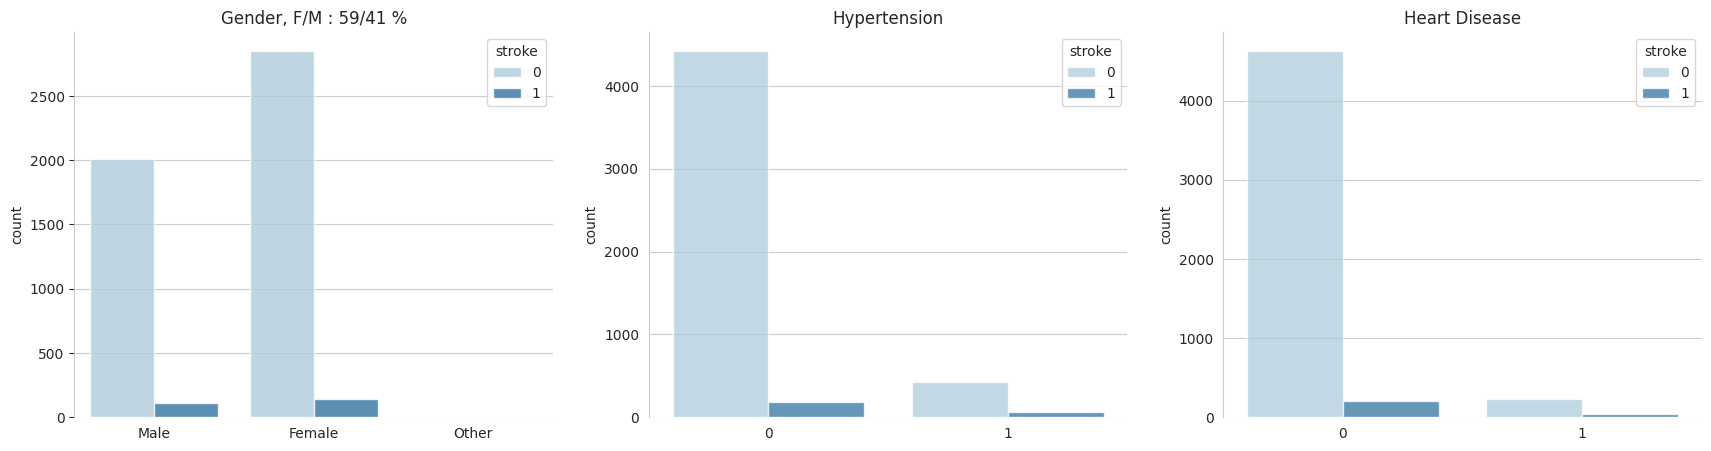

In [ ]:
# Import necessary libraries
import warnings  # Import the warnings module to handle warning messages

# Suppress warning messages to keep the output clean
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt  # Import Matplotlib for plotting
import seaborn as sns  # Import Seaborn for statistical visualizations

# Set figure size (21 inches wide, 5 inches tall) to make the plots more readable
plt.figure(figsize=(21, 5))

# ---- First Plot: Gender Distribution vs Stroke ----
plt.subplot(1, 3, 1)  # Create a subplot (1 row, 3 columns, position 1)
sns.countplot(x=df['gender'], alpha=0.8, palette="Paired", hue=df['stroke'])
# Count plot showing gender distribution, categorized by stroke occurrence

plt.tick_params(axis='both', which='both', bottom=False, left=True, right=False, top=False,
                labelbottom=True, labelleft=True)
# Adjusts the axis ticks:
# - `bottom=False, top=False` → Removes tick marks from top and bottom
# - `left=True, right=False` → Keeps left ticks, removes right ticks
# - `labelbottom=True, labelleft=True` → Keeps labels on the bottom and left axis

sns.despine(top=True, right=True, left=False, bottom=True)
# Removes unnecessary borders (top & right) for a cleaner visualization

plt.xlabel('')  # Remove x-axis label for simplicity
plt.title('Gender, F/M : 59/41 %')  # Set the title showing gender percentage in dataset

# ---- Second Plot: Hypertension vs Stroke ----
plt.subplot(1, 3, 2)  # Create a subplot (1 row, 3 columns, position 2)
sns.countplot(x=df['hypertension'], alpha=0.75, palette="Paired", hue=df['stroke'])
# Count plot showing hypertension cases, categorized by stroke occurrence

sns.despine(top=True, right=True, left=False, bottom=True)
# Remove top & right borders for a cleaner look

plt.xlabel('')  # Remove x-axis label
plt.title('Hypertension')  # Set the title

# ---- Third Plot: Heart Disease vs Stroke ----
plt.subplot(1, 3, 3)  # Create a subplot (1 row, 3 columns, position 3)
sns.countplot(x=df['heart_disease'], alpha=0.75, palette="Paired", hue=df['stroke'])
# Count plot showing heart disease cases, categorized by stroke occurrence

sns.despine(top=True, right=True, left=False, bottom=True)
# Remove unnecessary plot borders for a clean visualization

plt.xlabel('')  # Remove x-axis label
plt.title('Heart Disease')  # Set the title

# Show all plots together
plt.show()

Finally lets look at Age, Average Glucose Level, BMI to spot for any corelation

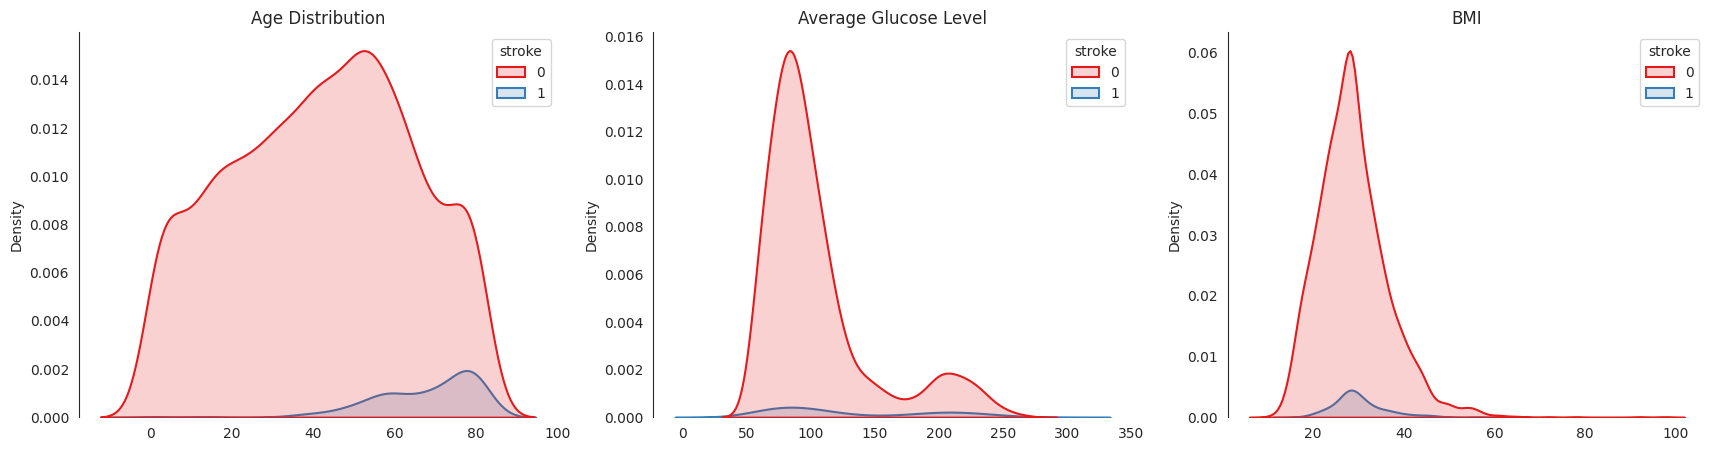

In [ ]:
# Import necessary libraries
import warnings  # Import the warnings module to handle warning messages

# Suppress warning messages to keep the output clean
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt  # Import Matplotlib for plotting
import seaborn as sns  # Import Seaborn for statistical visualizations

# Set the background style of the plots to white
sns.set_style('white')

# Set figure size (21 inches wide, 5 inches tall) to make the plots readable
plt.figure(figsize=(21, 5))

# ---- First Plot: Age Distribution vs Stroke ----
plt.subplot(1, 3, 1)  # Create a subplot (1 row, 3 columns, position 1)

sns.kdeplot(
    x=df['age'],  # Plot the kernel density estimation (KDE) for age
    alpha=0.2,  # Set transparency level (20% opacity)
    palette="Set1",  # Use the "Set1" color palette for styling
    label='Smoker',  # Label for legend (though not meaningful here)
    fill=True,  # Fill the area under the density curve
    linewidth=1.5,  # Set the line thickness
    hue=df['stroke']  # Color the plot based on stroke occurrence
)

sns.despine(top=True, right=True, left=True, bottom=True)
# Remove unnecessary borders to make the visualization cleaner

plt.xlabel('')  # Remove x-axis label for simplicity
plt.title('Age Distribution')  # Set the title of the plot

# ---- Second Plot: Average Glucose Level vs Stroke ----
plt.subplot(1, 3, 2)  # Create a subplot (1 row, 3 columns, position 2)

sns.kdeplot(
    x=df['avg_glucose_level'],  # KDE plot for average glucose level
    alpha=0.2,  # Set transparency level (20% opacity)
    palette="Set1",  # Use the "Set1" color palette
    label='avg_glucose_level',  # Label for legend
    linewidth=1.5,  # Set line thickness
    fill=True,  # Fill the area under the curve
    hue=df['stroke']  # Color the plot based on stroke occurrence
)

sns.despine(top=True, right=True, left=True, bottom=True)
# Remove unnecessary borders

plt.xlabel('')  # Remove x-axis label
plt.title('Average Glucose Level')  # Set the title of the plot

# ---- Third Plot: BMI vs Stroke ----
plt.subplot(1, 3, 3)  # Create a subplot (1 row, 3 columns, position 3)
# Kernel density plot
sns.kdeplot(
    x=df['bmi'],  # KDE plot for Body Mass Index (BMI)
    alpha=0.2,  # Set transparency level
    palette="Set1",  # Use the "Set1" color palette
    label='BMI',  # Label for legend
    shade=True,  # Fill the density curve (deprecated, use `fill=True`)
    linewidth=1.5,  # Set line thickness
    fill=True,  # Fill the area under the curve
    hue=df['stroke']  # Color the plot based on stroke occurrence
)

sns.despine(top=True, right=True, left=False, bottom=True)
# Remove unnecessary plot borders (except for the left one)

plt.xlabel('')  # Remove x-axis label
plt.title('BMI')  # Set the title

# Show all plots together
plt.show()


Lets look at a these factors more closely by fitting a regression line through the distribution

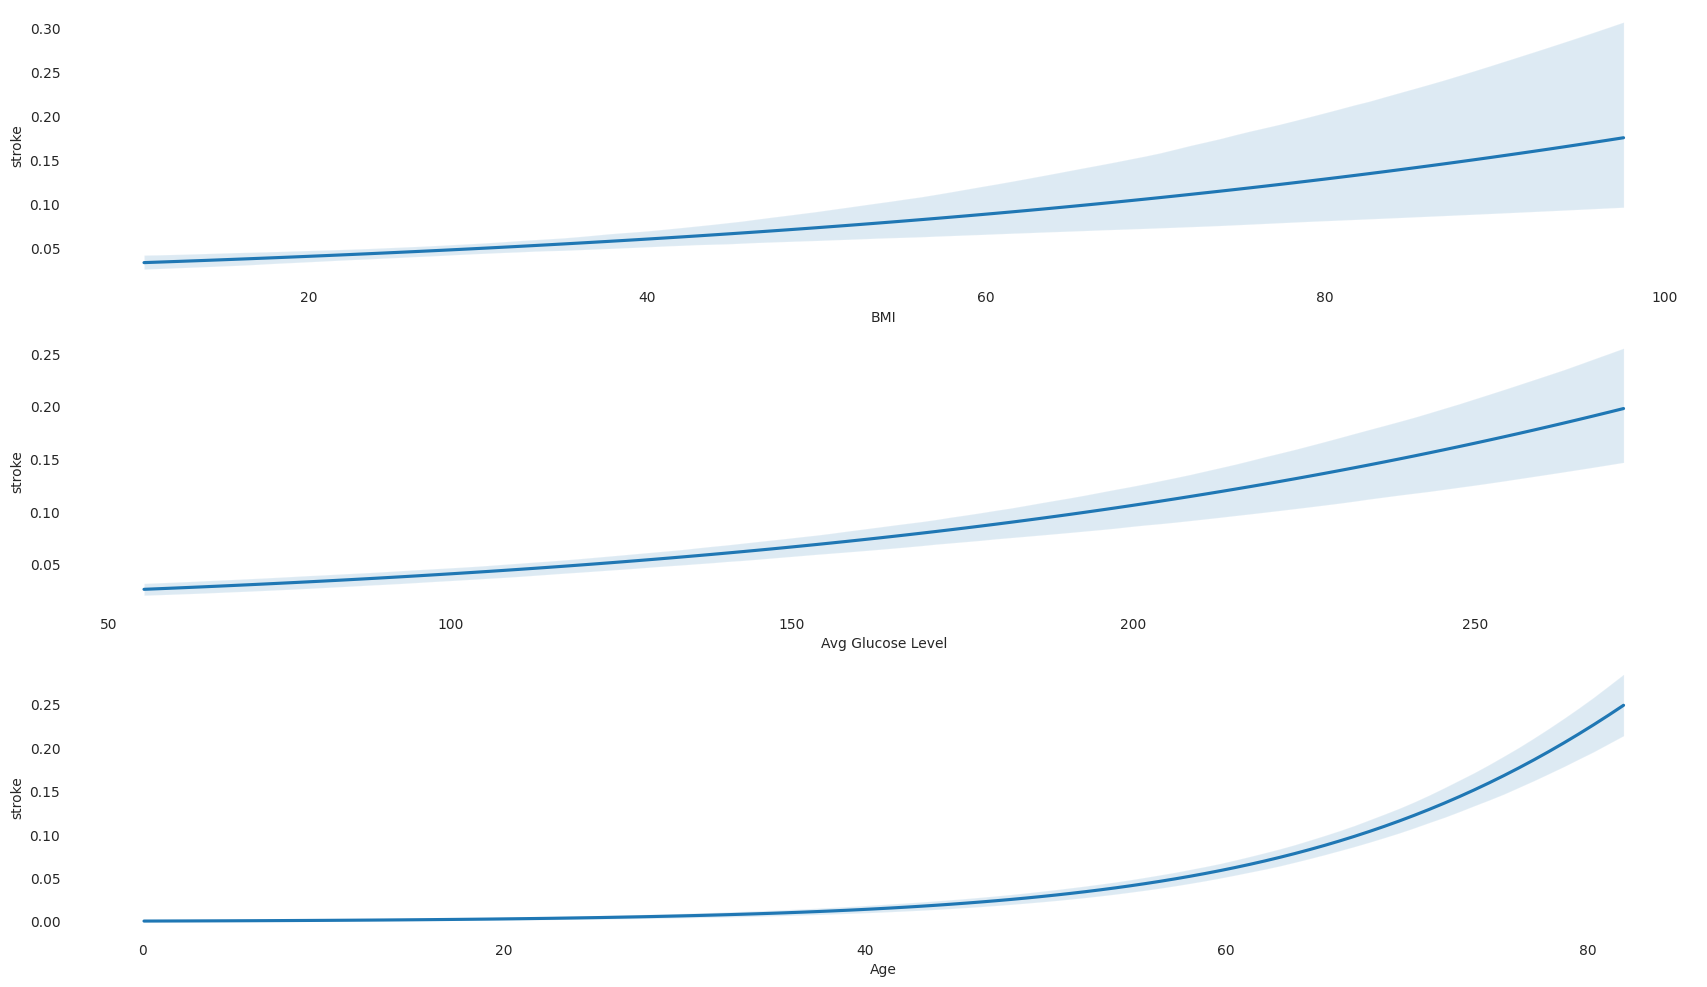

In [ ]:
# Import necessary libraries
import warnings  # Used to handle warnings

# Ignore warnings to avoid unnecessary messages in the output
warnings.filterwarnings('ignore')

# Set the figure size for the plots (Width: 21, Height: 12)
plt.figure(figsize=(21,12));

# ---- First Subplot: Relationship between BMI and Stroke ---- #
plt.subplot(3,1,1)  # Create the first subplot (3 rows, 1 column, position 1)
sns.regplot(
    x=df['bmi'],  # X-axis: BMI values
    y=df['stroke'],  # Y-axis: Stroke occurrence (0 = No, 1 = Yes)
    scatter=False,  # Do not show individual data points
    logistic=True,  # Use logistic regression (since stroke is binary: 0 or 1)
    label='BMI'  # Label for legend
);
# Remove unnecessary plot borders (top & right)
sns.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=True, offset=None, trim=False);
plt.xlabel('BMI');  # Set the x-axis label

# ---- Second Subplot: Relationship between Average Glucose Level and Stroke ---- #
plt.subplot(3,1,2)  # Create the second subplot (3 rows, 1 column, position 2)
sns.regplot(
    x=df['avg_glucose_level'],  # X-axis: Average Glucose Level
    y=df['stroke'],  # Y-axis: Stroke occurrence (0 = No, 1 = Yes)
    scatter=False,  # Do not show individual data points
    logistic=True,  # Use logistic regression for binary classification
    label='Avg Glucose Level'  # Label for legend
);
# Remove unnecessary plot borders (top & right)
sns.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=True, offset=None, trim=False);
plt.xlabel('Avg Glucose Level');  # Set the x-axis label

# ---- Third Subplot: Relationship between Age and Stroke ---- #
plt.subplot(3,1,3)  # Create the third subplot (3 rows, 1 column, position 3)
sns.regplot(
    x=df['age'],  # X-axis: Age of the patients
    y=df['stroke'],  # Y-axis: Stroke occurrence (0 = No, 1 = Yes)
    scatter=False,  # Do not show individual data points
    logistic=True,  # Use logistic regression for binary classification
    label='Age'  # Label for legend
);
# Remove unnecessary plot borders (top & right)
sns.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=True, offset=None, trim=False);
plt.xlabel('Age');  # Set the x-axis label

Age seems to be a dominating factor here, the plots tell that chances for stroke increase as age increases. Glucose level and BMI also seem to have a positive corelation with the stroke probability. These factors will contribue greatly towards predicting the stroke probability.

In [ ]:
# checking imbalances in class {1: stroke, 0:no stroke}
df['stroke'].value_counts()

,count
stroke,
0,4861
1,249


Our data appears imbalanced, this could make it difficult for our model to perform with desired score. We can fix this by oversampling later.

**Preprocessing Data**

In [ ]:
# --------------------- Encoding Categorical Values --------------------- #

# Encoding 'gender' column:
# Replacing categorical values with numeric values
# 'Male' → 0, 'Female' → 1, 'Other' → -1 (if present)
df['gender'] = df['gender'].replace({'Male': 0, 'Female': 1, 'Other': -1}).astype(np.uint8)

# Encoding 'Residence_type' column:
# 'Rural' → 0, 'Urban' → 1
df['Residence_type'] = df['Residence_type'].replace({'Rural': 0, 'Urban': 1}).astype(np.uint8)

# Encoding 'work_type' column:
# 'Private' → 0, 'Self-employed' → 1, 'Govt_job' → 2,
# 'children' → -1 (since children don’t work), 'Never_worked' → -2
df['work_type'] = df['work_type'].replace({'Private': 0, 'Self-employed': 1, 'Govt_job': 2,
                                           'children': -1, 'Never_worked': -2}).astype(np.uint8)

# Encoding 'ever_married' column:
# 'Yes' → 1 (Married), 'No' → 0 (Not Married)
df['ever_married'] = df['ever_married'].replace({'Yes': 1, 'No': 0}).astype(np.uint8)

# Encoding 'smoking_status' column:
# 'never smoked' → 0, 'Unknown' → 1, 'formerly smoked' → 2, 'smokes' → -1
# (Negative values indicate possible health risks)
df['smoking_status'] = df['smoking_status'].replace({'never smoked': 0, 'Unknown': 1,
                                                     'formerly smoked': 2, 'smokes': -1}).astype(np.uint8)


**Model Building**
We will be using following features to train our model :

**Gender:** "Male", "Female"
**Age:** age of the patient
**hypertension:** 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
**Heart disease:** 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
**Ever married:** "No" or "Yes"
**Work type:** "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
**Residence_type:** "Rural" or "Urban"
**Avg_glucose_level:** average glucose level in blood
BMI: body mass index
**Smoking_status:** "formerly smoked", "never smoked", "smokes" or "Unknown"*

In [ ]:
# --------------------- Defining Features and Target Variable --------------------- #

# X represents the feature variables (independent variables)
# We drop the 'stroke' column because it is the target variable we want to predict
X = df.drop('stroke', axis=1)

# y represents the target variable (dependent variable)
# We extract the 'stroke' column, which indicates whether a person had a stroke (1) or not (0)
y = df.pop('stroke')

**Model Building**

**SVM classifier** - performance was found to be good better than Logestic regression, and Random Forest

Set up our pipeline. Scale data before feeding it to classifier. SVM model do perform better after scaling.

In [ ]:
# Importing necessary libraries for SVM and preprocessing
from sklearn.svm import SVC  # Import Support Vector Classifier (SVM model)
from sklearn.pipeline import Pipeline  # Import Pipeline to streamline preprocessing and modeling
from sklearn.preprocessing import StandardScaler, LabelEncoder  # Import tools for feature scaling and encoding categorical variables

# Creating an SVM pipeline that includes feature scaling before applying SVM
svm_pipeline = Pipeline(steps=[
    ('scale', StandardScaler()),  # Step 1: Standardize the features to have zero mean and unit variance
    ('SVM', SVC(random_state=42, probability=True))  # Step 2: Apply the SVM classifier with probability estimation enabled
])

Spliting our data into training and test sets.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =  train_test_split(X, y)

In [ ]:
# Our data is biased (imbalanced classes), we can fix this using SMOTE (Synthetic Minority Over-sampling Technique)

from imblearn.over_sampling import SMOTE  # Import SMOTE for handling class imbalance

# Create an instance of the SMOTE technique
oversample = SMOTE() #Synthetic Minority Over-sampling Technique

# Apply SMOTE to generate synthetic samples for the minority class in the training data
X_train_resh, y_train_resh = oversample.fit_resample(X_train, y_train.ravel())

# Now, X_train_resh and y_train_resh contain a balanced dataset where both classes have equal

 ten-fold cross-validation is used

In [ ]:
# Import train-test split and cross-validation functions from scikit-learn
from sklearn.model_selection import train_test_split, cross_val_score

# Perform 10-fold cross-validation on the SVM pipeline using the resampled training data
svm_cv = cross_val_score(svm_pipeline, X_train_resh, y_train_resh, cv=10, scoring='f1')
#F1-score = 2 * (Precision * Recall) / (Precision + Recall)
# Compute and return the mean F1-score across all 10 folds
svm_cv.mean()

np.float64(0.8478737422253225)

**Model Evaluation**

Confusion matrix - this better describes the performance of our classification model.

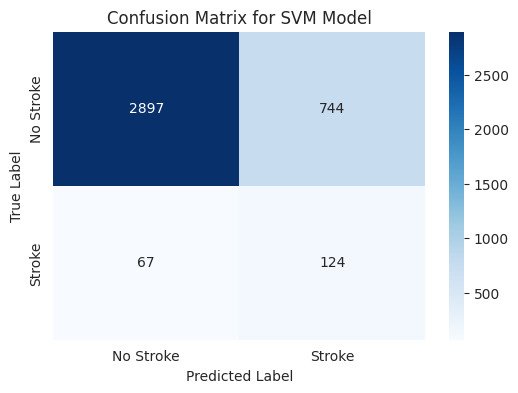

In [ ]:
# Importing confusion_matrix to evaluate the performance of the classifier
from sklearn.metrics import confusion_matrix

# Training the SVM model using the training dataset
svm_pipeline.fit(X_train_resh, y_train_resh)

# Predicting the labels for the training dataset
svm_train_predict = svm_pipeline.predict(X_train)

# Predicting the labels for the test dataset
svm_pred = svm_pipeline.predict(X_test)

# Creating a confusion matrix to evaluate the performance on the training dataset
svm_cm = confusion_matrix(y_train, svm_train_predict)

# Displaying the confusion matrix
#svm_cm

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6,4))
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])

# Labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for SVM Model')

# Show the plot
plt.show()

AUC :  0.7439796495195026


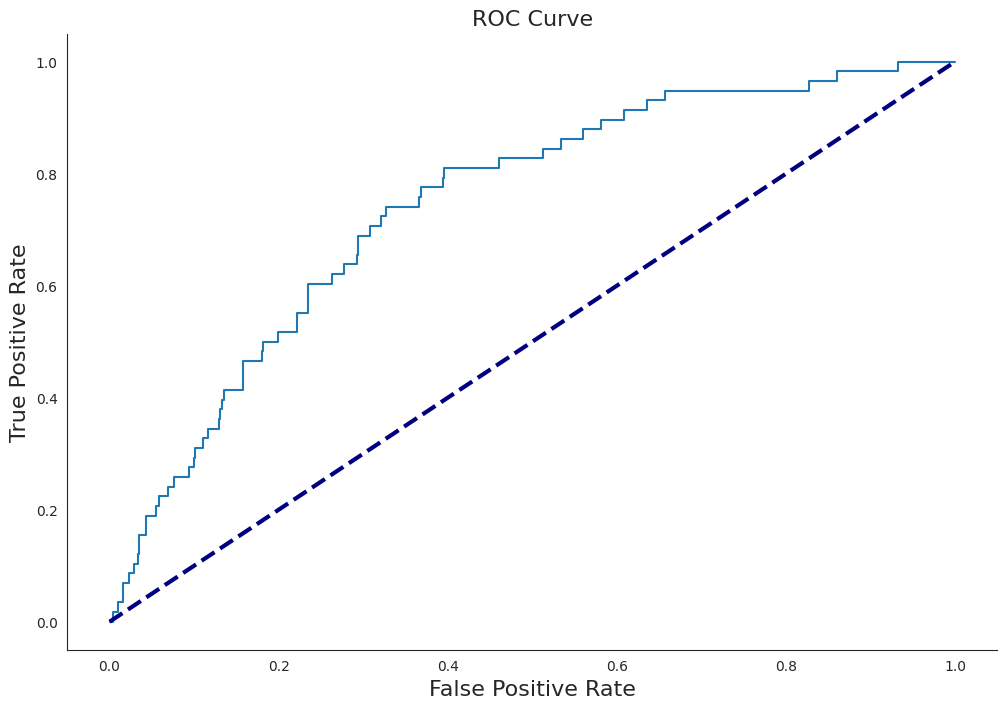

In [ ]:
# Import necessary libraries for ROC curve and AUC calculation
#ROC -  Receiver Operating Characteristic
#AUC -  Area Under the Curve

from sklearn.metrics import roc_curve, auc

# Compute False Positive Rate (FPR) and True Positive Rate (TPR) for SVM model
fpr_lr, tpr_lr, _ = roc_curve(y_test, svm_pipeline.predict_proba(X_test)[:,1])

# Create a figure with a specified size
plt.figure(figsize=(12,8));

# Plot the ROC curve
plt.plot(fpr_lr, tpr_lr, label="ROC Curve");

# Label the axes
plt.xlabel('False Positive Rate', fontsize=16);  # X-axis: False Positive Rate
plt.ylabel('True Positive Rate', fontsize=16);  # Y-axis: True Positive Rate
plt.title('ROC Curve', fontsize=16);  # Title of the plot

# Plot the reference diagonal line representing random classification (baseline)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--', label="Random Guess");

# Remove the top and right spines for a cleaner look
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False);

# Print the AUC (Area Under the Curve) score, which measures the performance of the classifier
print('AUC : ', auc(fpr_lr, tpr_lr))

In [ ]:
# Import necessary metrics for model evaluation
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score

# Generate and print the classification report
# The classification report provides precision, recall, F1-score, and support for each class
print(classification_report(y_test, svm_pred))

# Calculate and print the Accuracy Score
# Accuracy Score = (Correct Predictions) / (Total Predictions)
print('Accuracy Score: ', accuracy_score(y_test, svm_pred))

# Calculate and print the F1 Score
# F1 Score is the harmonic mean of precision and recall, useful for imbalanced datasets
print('F1 Score: ', f1_score(y_test, svm_pred))

              precision    recall  f1-score   support

           0       0.96      0.78      0.86      1209
           1       0.11      0.49      0.19        69

    accuracy                           0.77      1278
   macro avg       0.54      0.64      0.52      1278
weighted avg       0.92      0.77      0.83      1278

Accuracy Score:  0.7668231611893583
F1 Score:  0.18579234972677597


**SMOTE**

Potential Issues & Solutions
**Risk of Unrealistic Data** - Some new synthetic cases may not be clinically valid.

**Not Effective for Highly Non-Linear Data** - If stroke risk factors have non-linear dependencies, SMOTE may not generate meaningful data.

**Feature Scaling Impact** - Since SMOTE works in feature space, unscaled numerical data can distort synthetic sample generation.